In [78]:
import pymysql as sql
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import math
import os
import rds_config
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
plt.rcParams['figure.figsize'] = (20.0, 10.0)

import warnings
warnings.filterwarnings('ignore')

import helper_functions

In [79]:
# open database
engine = helper_functions.create_db_engine()

In [80]:
df_player_season_stats = pd.read_sql('''SELECT g.Player, p.* 
                                        FROM PlayerSeasonStatsPerGameYTD p
                                        JOIN GeneralPlayerInfo g on g.PlayerID = p.PlayerID
                                        ORDER BY MPPerG desc''', con=engine)
df_player_season_stats

,Player,PlayerID,Season,GameTypeID,Age,TeamID,MPPerG,FGPerG,FGAPerG,FGPercent,...,FTPercent,ORBPerG,DRBPerG,TRBPerG,ASTPerG,STLPerG,BLKPerG,TOVPerG,PFPerG,PTSPerG
0,Troy Williams,1565,2017,1,22,11,39.0,7.0,12.0,0.583,...,0.500,1.0,4.0,5.0,3.0,1.0,0.0,1.0,5.0,21.0
1,Kyle Lowry,829,2017,1,30,28,37.7,7.2,15.5,0.463,...,0.826,0.8,3.9,4.8,6.9,1.4,0.3,2.8,2.9,22.8
2,LeBron James,612,2017,1,32,6,37.6,9.9,18.2,0.544,...,0.669,1.3,7.2,8.5,8.7,1.2,0.6,4.1,1.8,26.3
3,Andrew Wiggins,1409,2017,1,21,18,37.3,8.5,18.8,0.453,...,0.753,1.3,2.7,4.0,2.3,1.0,0.4,2.3,2.3,23.2
4,Zach LaVine,1410,2017,1,21,18,37.2,6.9,15.1,0.459,...,0.836,0.4,3.0,3.4,3.0,0.9,0.2,1.8,2.2,18.9
5,Jimmy Butler,1199,2017,1,27,5,37.0,7.5,16.5,0.454,...,0.862,1.7,4.5,6.2,5.5,1.9,0.4,2.0,1.5,23.9
6,Karl-Anthony Towns,1494,2017,1,21,18,37.0,9.6,18.0,0.534,...,0.827,3.7,8.4,12.1,2.7,0.7,1.3,2.6,3.0,24.7
7,James Harden,1045,2017,1,27,11,36.5,8.4,19.0,0.441,...,0.852,1.2,6.9,8.1,11.2,1.5,0.4,5.8,2.6,29.2
8,John Wall,1110,2017,1,26,30,36.4,8.3,18.5,0.451,...,0.807,0.8,3.5,4.2,10.7,2.0,0.6,4.1,1.9,23.2
9,Anthony Davis,1239,2017,1,23,19,36.2,10.2,20.1,0.505,...,0.803,2.3,9.7,12.0,2.2,1.3,2.2,2.5,2.2,27.8


In [81]:
df_team_scores = pd.read_sql('''SELECT t.GameID, t.TeamID, t.FinalScore, topp.FinalScore as OppFinalScore
                                FROM BasketballDatabase.TeamGameStatsYTD t
                                JOIN (SELECT * 
                                        FROM BasketballDatabase.TeamGameStatsYTD) topp 
                                            on (t.GameID = topp.GameID AND t.TeamID <> topp.TeamID)
                                ORDER BY t.GameID;''', con=engine)

df_team_scores

,GameID,TeamID,FinalScore,OppFinalScore
0,20599,20,88,117
1,20599,6,117,88
2,20600,27,129,100
3,20600,10,100,129
4,20601,29,104,113
5,20601,25,113,104
6,20602,3,117,122
7,20602,2,122,117
8,20603,12,130,121
9,20603,7,121,130


In [82]:
df_team_scores['AvgPPGAllowed'] = df_team_scores.groupby('TeamID')['OppFinalScore'].apply(pd.rolling_mean, 20, min_periods=20)
df_team_scores['AvgPPGAllowed'] = df_team_scores.groupby('TeamID')['AvgPPGAllowed'].shift(1)

df_team_scores.drop(df_team_scores.columns[[2,3]], axis=1, inplace=True)

df_team_scores[df_team_scores['TeamID'] == 6]

,GameID,TeamID,AvgPPGAllowed
1,20599,6,NaN
47,20622,6,NaN
55,20626,6,NaN
91,20644,6,NaN
128,20663,6,NaN
169,20683,6,NaN
200,20699,6,NaN
255,20726,6,NaN
278,20738,6,NaN
305,20751,6,NaN


In [83]:
df_player_game_stats = pd.read_sql('''SELECT p.GameID, p.PlayerID, p.TeamID, t.TeamID as OppTeamID,
                                        p.PTS, p.3P, p.TRB, p.AST, p.STL, p.BLK, p.TOV
                                        FROM BasketballDatabase.PlayerGameStatsYTD p
                                        JOIN BasketballDatabase.TeamGameStatsYTD t on (t.GameID = p.GameID and t.TeamID <> p.TeamID)
                                        JOIN BasketballDatabase.TeamSeasonAdvStatsYTD ta on (ta.TeamID = t.TeamID);''', con=engine)

df_player_game_stats = pd.merge(df_player_game_stats, df_team_scores, left_on=['GameID', 'OppTeamID'], right_on=['GameID', 'TeamID'])
#df_player_game_stats.dropna(inplace=True)
df_player_game_stats.drop('TeamID_y', axis=1, inplace=True)
df_player_game_stats.rename(columns={'TeamID_x': 'TeamID', 'AvgPPGAllowed': 'AvgPPGAllowedByOpp'}, inplace=True)

df_player_game_stats

,GameID,PlayerID,TeamID,OppTeamID,PTS,3P,TRB,AST,STL,BLK,TOV,AvgPPGAllowedByOpp
0,20599,602,20,6,19,1,5,3,1,0,4,NaN
1,20599,688,20,6,1,0,0,1,0,0,1,NaN
2,20599,930,20,6,0,0,6,3,1,0,1,NaN
3,20599,962,20,6,17,1,3,1,0,1,4,NaN
4,20599,1001,20,6,0,0,3,0,0,1,2,NaN
5,20599,1059,20,6,7,0,3,5,0,0,1,NaN
6,20599,1189,20,6,2,0,1,1,2,0,1,NaN
7,20599,1268,20,6,2,0,5,1,0,2,1,NaN
8,20599,1306,20,6,8,2,6,2,1,0,0,NaN
9,20599,1501,20,6,16,3,7,0,1,2,2,NaN


In [84]:
# Get Average counting stats up to that game for prediction purposes
df_player_game_stats.sort_values(by='GameID', inplace=True)

df_player_game_stats['PPG'] = df_player_game_stats['PTS'].groupby(df_player_game_stats['PlayerID']).apply(pd.rolling_mean, 20, min_periods=20)
df_player_game_stats['PPG'] = df_player_game_stats['PPG'].groupby(df_player_game_stats['PlayerID']).shift(1)

#df_player_game_stats['3PPG'] = df_player_game_stats.groupby('PlayerID')['3P'].apply(pd.expanding_mean)
#df_player_game_stats['3PPG'] = df_player_game_stats.groupby('PlayerID')['3PPG'].shift(1)

#df_player_game_stats['TRPG'] = df_player_game_stats.groupby('PlayerID')['TRB'].apply(pd.expanding_mean)
#df_player_game_stats['TRPG'] = df_player_game_stats.groupby('PlayerID')['TRPG'].shift(1)

#df_player_game_stats['ASTPG'] = df_player_game_stats.groupby('PlayerID')['AST'].apply(pd.expanding_mean)
#df_player_game_stats['ASTPG'] = df_player_game_stats.groupby('PlayerID')['ASTPG'].shift(1)

#df_player_game_stats['STLPG'] = df_player_game_stats.groupby('PlayerID')['STL'].apply(pd.expanding_mean)
#df_player_game_stats['STLPG'] = df_player_game_stats.groupby('PlayerID')['STLPG'].shift(1)

#df_player_game_stats['BLKPG'] = df_player_game_stats.groupby('PlayerID')['BLK'].apply(pd.expanding_mean)
#df_player_game_stats['BLKPG'] = df_player_game_stats.groupby('PlayerID')['BLKPG'].shift(1)

#df_player_game_stats['TOVPG'] = df_player_game_stats.groupby('PlayerID')['TOV'].apply(pd.expanding_mean)
#df_player_game_stats['TOVPG'] = df_player_game_stats.groupby('PlayerID')['TOVPG'].shift(1)

df_player_game_stats[df_player_game_stats['PlayerID'] == 1173]

,GameID,PlayerID,TeamID,OppTeamID,PTS,3P,TRB,AST,STL,BLK,TOV,AvgPPGAllowedByOpp,PPG
89,20602,1173,2,3,25,2,6,8,2,0,3,NaN,NaN
324,20613,1173,2,5,25,3,3,4,2,0,5,NaN,NaN
585,20625,1173,2,4,24,2,1,7,0,0,2,NaN,NaN
1215,20654,1173,2,5,23,4,2,10,3,1,3,NaN,NaN
1411,20663,1173,2,6,30,0,3,6,0,0,3,NaN,NaN
1906,20685,1173,2,8,30,1,1,5,1,0,4,NaN,NaN
2527,20714,1173,2,30,23,1,6,10,0,0,3,NaN,NaN
2636,20719,1173,2,20,29,3,3,4,1,0,2,NaN,NaN
2886,20731,1173,2,12,23,1,0,5,1,0,2,NaN,NaN
3239,20747,1173,2,19,37,3,3,7,2,0,1,NaN,NaN


In [85]:
df_player_game_stats = df_player_game_stats.dropna()

df_player_game_stats['AvgPPGAllowedByOppNorm'] = (df_player_game_stats['AvgPPGAllowedByOpp'] - 
                                                  df_player_game_stats['AvgPPGAllowedByOpp'].mean()) / \
                                                (df_player_game_stats['AvgPPGAllowedByOpp'].max() - 
                                                 df_player_game_stats['AvgPPGAllowedByOpp'].min())

df_player_game_stats['PPGNorm'] = (df_player_game_stats['PPG'] - df_player_game_stats['PPG'].mean()) / \
                                    (df_player_game_stats['PPG'].max() - df_player_game_stats['PPG'].min())

In [86]:
print(df_player_game_stats['AvgPPGAllowedByOpp'].min())
df_player_game_stats[df_player_game_stats['PlayerID'] == 1173]

93.85


,GameID,PlayerID,TeamID,OppTeamID,PTS,3P,TRB,AST,STL,BLK,TOV,AvgPPGAllowedByOpp,PPG,AvgPPGAllowedByOppNorm,PPGNorm
6672,20906,1173,2,11,20,3,2,3,2,0,2,107.50,26.30,0.062353,0.452736
8365,20986,1173,2,4,26,2,3,5,0,0,2,104.25,26.05,-0.073063,0.445531
8773,21005,1173,2,16,23,3,2,4,1,0,2,100.95,26.10,-0.210563,0.446972
9082,21019,1173,2,15,44,7,3,6,2,1,1,94.10,26.05,-0.495980,0.445531
9413,21035,1173,2,12,28,2,1,9,0,0,0,103.35,27.10,-0.110563,0.475790
9499,21039,1173,2,21,34,2,2,10,1,0,5,107.05,27.00,0.043603,0.472909
9838,21055,1173,2,20,27,3,3,4,0,0,2,106.55,27.20,0.022770,0.478672
10138,21069,1173,2,15,21,1,1,7,0,0,4,98.15,27.40,-0.327230,0.484436
10454,21084,1173,2,6,31,2,3,9,2,0,3,102.70,27.00,-0.137647,0.472909
10576,21090,1173,2,16,52,9,2,0,1,0,2,104.05,27.40,-0.081397,0.484436


In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [88]:
jharden = df_player_game_stats[df_player_game_stats['PlayerID'] == 1045]

lm = smf.ols('PTS ~ PPGNorm + AvgPPGAllowedByOppNorm', data=df_player_game_stats).fit()

print(lm.summary())

predpts = lm.predict()

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     8562.
Date:                Mon, 10 Apr 2017   Prob (F-statistic):               0.00
Time:                        22:38:57   Log-Likelihood:                -49414.
No. Observations:               15599   AIC:                         9.883e+04
Df Residuals:                   15596   BIC:                         9.886e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 10

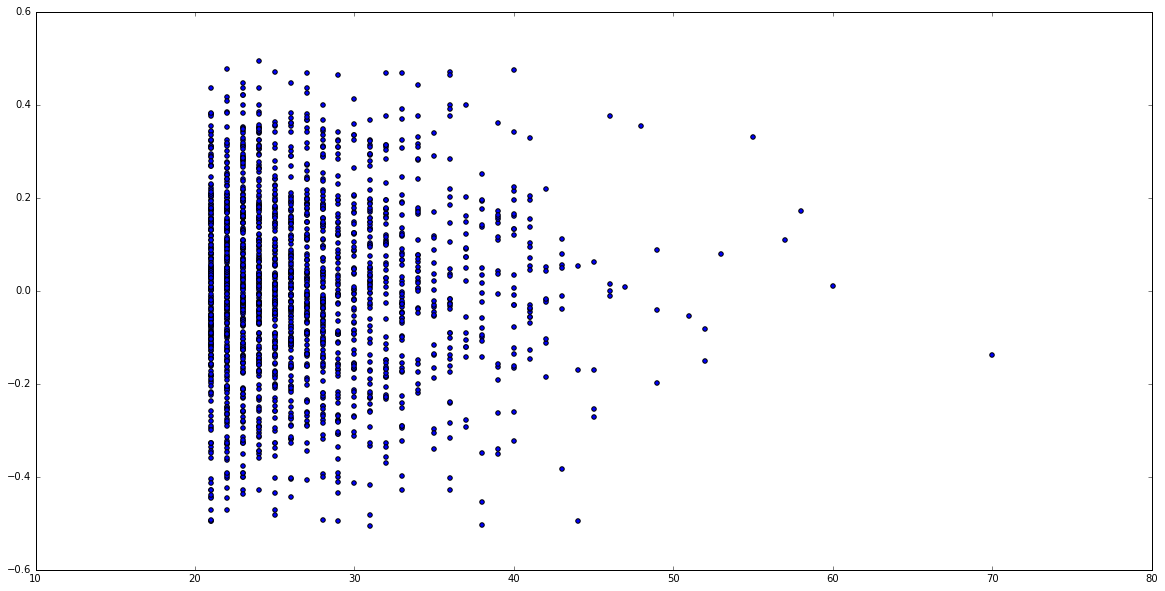

In [89]:
plt.scatter(df_player_game_stats[df_player_game_stats['PTS'] > 20]['PTS'], 
            df_player_game_stats[df_player_game_stats['PTS'] > 20]['AvgPPGAllowedByOppNorm'])

Using Opponenets Team Defence as predictor for estimating an individual players points didn't work.  Going to try and estimate by using the Defensive Rating of the player he is likely to face on the opponents team.

In [90]:
df_team_game_stats = pd.read_sql('''SELECT tgs.GameID, tgs.TeamID, tgs.FinalScore, tgs.Pace, 
                                            opp.TeamID as OppTeamID, opp.FinalScore as OppScore,
                                            opp.3PA as Opp3PA, opp.3P as Opp3P
                                        FROM BasketballDatabase.TeamGameStatsYTD tgs
                                        JOIN BasketballDatabase.TeamGameStatsYTD opp 
                                            on (tgs.GameID = opp.GameID and tgs.TeamID <> opp.TeamID)
                                        ORDER BY GameID''', con=engine)

df_team_game_stats['TotalPoints'] = df_team_game_stats['FinalScore'].groupby(df_team_game_stats['TeamID']).apply(pd.expanding_sum)
df_team_game_stats['TotalPoints'] = df_team_game_stats['TotalPoints'].groupby(df_team_game_stats['TeamID']).shift(1)

df_team_game_stats['TotalOppPoints'] = df_team_game_stats['OppScore'].groupby(df_team_game_stats['TeamID']).apply(pd.expanding_sum)
df_team_game_stats['TotalOppPoints'] = df_team_game_stats['TotalOppPoints'].groupby(df_team_game_stats['TeamID']).shift(1)

df_team_game_stats['AvgPace'] = df_team_game_stats['Pace'].groupby(df_team_game_stats['TeamID']).apply(pd.expanding_mean, 10)
df_team_game_stats['AvgPace'] = df_team_game_stats['AvgPace'].groupby(df_team_game_stats['TeamID']).shift(1)

df_team_game_stats['OppTotal3PA'] = df_team_game_stats['Opp3PA'].groupby(df_team_game_stats['TeamID']).apply(pd.expanding_sum)
df_team_game_stats['OppTotal3PA'] = df_team_game_stats['OppTotal3PA'].groupby(df_team_game_stats['TeamID']).shift(1)

df_team_game_stats['OppTotal3P'] = df_team_game_stats['Opp3P'].groupby(df_team_game_stats['TeamID']).apply(pd.expanding_sum)
df_team_game_stats['OppTotal3P'] = df_team_game_stats['OppTotal3P'].groupby(df_team_game_stats['TeamID']).shift(1)

df_team_game_stats['Opp3P%Allowed'] = df_team_game_stats['OppTotal3P'] / df_team_game_stats['OppTotal3PA']

df_team_game_stats['OppAvg3P%Allowed'] = df_team_game_stats['Opp3P%Allowed'].groupby(df_team_game_stats['TeamID']).apply(pd.expanding_mean, 10)
df_team_game_stats['OppAvg3P%Allowed'] = df_team_game_stats['OppAvg3P%Allowed'].groupby(df_team_game_stats['TeamID']).shift(1)

df_team_game_stats = df_team_game_stats.merge(df_team_game_stats, left_on=['GameID', 'OppTeamID'], right_on=['GameID', 'TeamID'],
                                             suffixes=['', '_Opp'])

df_team_game_stats.drop(['TeamID_Opp', 'FinalScore_Opp', 'Pace_Opp', 'OppTeamID_Opp', 'OppScore_Opp'], axis=1, inplace=True)

df_team_game_stats[df_team_game_stats['TeamID'] == 6]

,GameID,TeamID,FinalScore,Pace,OppTeamID,OppScore,Opp3PA,Opp3P,TotalPoints,TotalOppPoints,...,OppAvg3P%Allowed,Opp3PA_Opp,Opp3P_Opp,TotalPoints_Opp,TotalOppPoints_Opp,AvgPace_Opp,OppTotal3PA_Opp,OppTotal3P_Opp,Opp3P%Allowed_Opp,OppAvg3P%Allowed_Opp
0,20599,6,117,99.9,20,88,27,9,NaN,NaN,...,NaN,35,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,20622,6,94,93.9,28,91,16,4,117,88,...,NaN,32,12,109,91,NaN,22,4,0.181818,NaN
54,20626,6,105,96.5,22,99,28,8,211,179,...,NaN,37,11,178,216,NaN,35,11,0.314286,NaN
90,20644,6,128,92.8,11,120,44,17,316,278,...,NaN,32,16,313,310,NaN,94,31,0.329787,NaN
129,20663,6,128,99.4,2,122,32,11,444,398,...,NaN,34,14,432,420,NaN,121,42,0.347107,NaN
168,20683,6,102,102.3,23,101,38,14,572,520,...,NaN,38,14,363,419,NaN,101,30,0.297030,NaN
201,20699,6,106,97.6,1,110,29,11,674,621,...,NaN,42,11,644,581,NaN,139,47,0.338129,NaN
254,20726,6,105,97.4,30,94,15,3,780,731,...,NaN,33,14,710,726,NaN,203,78,0.384236,NaN
279,20738,6,100,92.5,4,93,29,11,885,825,...,NaN,38,14,847,790,NaN,244,76,0.311475,NaN
304,20751,6,121,99.0,28,117,29,13,985,918,...,NaN,33,13,948,893,NaN,228,78,0.342105,NaN


In [91]:
df_player_game_stats = pd.read_sql('''SELECT g.Player, pgs.GameID, pgs.PlayerID, pgs.TeamID, pgs.MP, pgs.PTS, pgs.DRtg, tgs.PACE
                                        FROM BasketballDatabase.PlayerGameStatsYTD pgs
                                        JOIN BasketballDatabase.TeamGameStatsYTD tgs 
                                                on (tgs.GameID = pgs.GameID and tgs.TeamID = pgs.TeamID)
                                        JOIN GeneralPlayerInfo g on g.PlayerID = pgs.PlayerID
                                        ORDER BY GameID''', con=engine)

df_player_game_stats['MP'] = df_player_game_stats['MP'].apply(lambda x: int(x.split(':')[0]) + float(x.split(':')[1]) / 60)

df_player_game_stats['AvgDRtg'] = df_player_game_stats['DRtg'].groupby(df_player_game_stats['PlayerID']).apply(pd.expanding_mean, 10)
df_player_game_stats['AvgDRtg'] = df_player_game_stats['AvgDRtg'].groupby(df_player_game_stats['PlayerID']).shift(1)

df_player_game_stats['PPG'] = df_player_game_stats['PTS'].groupby(df_player_game_stats['PlayerID']).apply(pd.expanding_mean, 10)
df_player_game_stats['PPG'] = df_player_game_stats['PPG'].groupby(df_player_game_stats['PlayerID']).shift(1)
    
df_player_game_stats[df_player_game_stats['PlayerID'] == 612]

,Player,GameID,PlayerID,TeamID,MP,PTS,DRtg,PACE,AvgDRtg,PPG
12,LeBron James,20599,612,6,32.383333,19,90,99.9,NaN,NaN
505,LeBron James,20622,612,6,38.666667,21,100,93.9,NaN,NaN
607,LeBron James,20626,612,6,39.000000,23,103,96.5,NaN,NaN
1005,LeBron James,20644,612,6,35.850000,19,127,92.8,NaN,NaN
1412,LeBron James,20663,612,6,36.366667,30,124,99.4,NaN,NaN
1859,LeBron James,20683,612,6,35.866667,25,96,102.3,NaN,NaN
2193,LeBron James,20699,612,6,36.866667,23,107,97.6,NaN,NaN
2789,LeBron James,20726,612,6,38.100000,27,90,97.4,NaN,NaN
3036,LeBron James,20738,612,6,38.700000,19,99,92.5,NaN,NaN
3324,LeBron James,20751,612,6,38.066667,28,117,99.0,NaN,NaN


In [92]:
def pythWins(points_for, points_against):
    exp = 16.5
    return (math.pow(points_for, exp) / (math.pow(points_for, exp) + math.pow(points_against, exp))) * 82

def minMaxNorm(col):
    return (col - col.mean()) / (col.max() - col.min())

In [93]:
df_player_game_stats = df_player_game_stats.merge(df_team_game_stats, how='left', on=['GameID', 'TeamID'])
df_player_game_stats.dropna(inplace=True)

df_player_game_stats['ExpectedPythWins'] = df_player_game_stats.apply(
    lambda x: pythWins(x['TotalPoints'], x['TotalOppPoints']), axis=1)
df_player_game_stats['OppExpectedPythWins'] = df_player_game_stats.apply(
    lambda x: pythWins(x['TotalPoints_Opp'], x['TotalOppPoints_Opp']), axis=1)

df_player_game_stats['ExpectedPythWinsDiff'] = df_player_game_stats['ExpectedPythWins'] - df_player_game_stats['OppExpectedPythWins']

df_player_game_stats['AvgDRtgNorm'] = (df_player_game_stats['AvgDRtg'] - df_player_game_stats['AvgDRtg'].mean()) / \
                                        (df_player_game_stats['AvgDRtg'].max() - df_player_game_stats['AvgDRtg'].min())

df_player_game_stats['ExpectedPythWinsNorm'] = (df_player_game_stats['ExpectedPythWins'] - 
                                                df_player_game_stats['ExpectedPythWins'].mean()) / \
                                                (df_player_game_stats['ExpectedPythWins'].max()
                                                 - df_player_game_stats['ExpectedPythWins'].min())
    
df_player_game_stats['OppExpectedPythWinsNorm'] = (df_player_game_stats['OppExpectedPythWins'] -
                                                   df_player_game_stats['OppExpectedPythWins'].mean()) / \
                                                (df_player_game_stats['OppExpectedPythWins'].max() -
                                                 df_player_game_stats['OppExpectedPythWins'].min())
    
df_player_game_stats['ExpectedPythWinsDiffNorm'] = (df_player_game_stats['ExpectedPythWinsDiff'] -
                                                   df_player_game_stats['ExpectedPythWinsDiff'].mean()) / \
                                                (df_player_game_stats['ExpectedPythWinsDiff'].max() -
                                                 df_player_game_stats['ExpectedPythWinsDiff'].min())

df_player_game_stats['PPGNorm'] = (df_player_game_stats['PPG'] - df_player_game_stats['PPG'].mean()) / \
                                (df_player_game_stats['PPG'].max() - df_player_game_stats['PPG'].min())
    
df_player_game_stats['AvgPaceNorm'] = (df_player_game_stats['AvgPace'] - df_player_game_stats['AvgPace'].mean()) / \
                                (df_player_game_stats['AvgPace'].max() - df_player_game_stats['AvgPace'].min())
    
df_player_game_stats['AvgOppPaceNorm'] = (df_player_game_stats['AvgPace_Opp'] - df_player_game_stats['AvgPace_Opp'].mean()) / \
                                (df_player_game_stats['AvgPace_Opp'].max() - df_player_game_stats['AvgPace_Opp'].min())
    
df_player_game_stats['PaceNorm'] = (df_player_game_stats['PACE'] - df_player_game_stats['PACE'].mean()) / \
                                (df_player_game_stats['PACE'].max() - df_player_game_stats['PACE'].min())

df_player_game_stats[df_player_game_stats['PlayerID'] == 612]

,Player,GameID,PlayerID,TeamID,MP,PTS,DRtg,PACE,AvgDRtg,PPG,...,OppExpectedPythWins,ExpectedPythWinsDiff,AvgDRtgNorm,ExpectedPythWinsNorm,OppExpectedPythWinsNorm,ExpectedPythWinsDiffNorm,PPGNorm,AvgPaceNorm,AvgOppPaceNorm,PaceNorm
3815,LeBron James,20774,612,6,28.050000,21,91,95.3,105.300000,23.400000,...,46.729661,10.915169,-0.095451,0.252390,0.091042,0.000824,0.405760,0.103475,-0.125376,95.3
4642,LeBron James,20812,612,6,37.500000,31,120,98.3,104.000000,23.181818,...,29.042134,32.472040,-0.129720,0.311185,-0.177723,-0.001608,0.399143,0.091002,0.191518,98.3
4897,LeBron James,20824,612,6,29.050000,19,94,96.7,105.333333,23.833333,...,16.161422,45.943944,-0.094573,0.320168,-0.373448,-0.003379,0.418902,0.099350,-0.320500,96.7
5417,LeBron James,20848,612,6,41.500000,26,110,96.6,104.461538,23.461538,...,14.895736,51.824730,-0.117553,0.390295,-0.392680,-0.003553,0.407627,0.097145,0.103975,96.6
5683,LeBron James,20860,612,6,32.883333,22,122,99.6,104.857143,23.642857,...,38.791348,27.172653,-0.107125,0.378801,-0.029582,-0.000268,0.413126,0.094688,-0.024216,99.6
5998,LeBron James,20875,612,6,33.616667,16,116,94.7,106.000000,23.533333,...,67.436596,-4.993950,-0.076999,0.325293,0.405687,0.003670,0.409804,0.107896,0.002772,94.7
6126,LeBron James,20881,612,6,44.666667,27,118,97.0,106.625000,23.062500,...,58.425879,0.256630,-0.060524,0.268157,0.268768,0.002432,0.395525,0.095941,-0.089841,97.0
6780,LeBron James,20911,612,6,42.016667,34,119,92.9,107.294118,23.294118,...,65.108865,-8.180710,-0.042886,0.241500,0.370317,0.003350,0.402549,0.095780,-0.136434,92.9
7056,LeBron James,20925,612,6,32.450000,25,101,93.8,107.944444,23.888889,...,36.138417,20.555326,-0.025743,0.237938,-0.069894,-0.000632,0.420587,0.077961,0.002854,93.8
7296,LeBron James,20936,612,6,37.316667,27,90,87.8,107.578947,23.947368,...,32.687423,27.428570,-0.035378,0.289939,-0.122332,-0.001107,0.422361,0.065609,-0.217526,87.8


In [94]:
lm = smf.ols('PTS ~ PPGNorm + PaceNorm', data=df_player_game_stats).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                 1.109e+04
Date:                Mon, 10 Apr 2017   Prob (F-statistic):               0.00
Time:                        22:39:00   Log-Likelihood:                -61729.
No. Observations:               19603   AIC:                         1.235e+05
Df Residuals:                   19600   BIC:                         1.235e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.8668      0.763      5.069      0.0



## Class 0 Defensive Calculations

In [95]:
df_player_game_stats = pd.read_sql('''SELECT g.Player, p.* 
                                        FROM PlayerGameStatsYTD p
                                        JOIN GeneralPlayerInfo g on g.PlayerID = p.PlayerID
                                        ORDER BY GameID''', con=engine)

df_team_game_stats = pd.read_sql('''SELECT *
                                    FROM TeamGameStatsYTD
                                    ORDER BY GameID''', con=engine)

df_team_game_stats

,GameID,Season,Date,GameTypeID,Home,Team,TeamID,Q1Score,Q2Score,Q3Score,...,FTr,ORBPercent,DRBPercent,TRBPercent,ASTPercent,STLPercent,BLKPercent,TOVPercent,ORtg,DRtg
0,20599,2017,2016-10-25 19:30:00,1,b'\x01',CLE,6,28,20,34,...,0.202,27.5,75.5,54.8,68.9,12.0,8.3,12.0,117.1,88.1
1,20599,2017,2016-10-25 19:30:00,1,b'\x00',NYK,20,18,27,19,...,0.230,24.5,72.5,45.2,53.1,6.0,10.2,15.8,88.1,117.1
2,20600,2017,2016-10-25 22:30:00,1,b'\x01',GSW,10,20,26,31,...,0.212,19.0,56.3,38.9,60.0,11.2,8.1,14.7,101.8,131.3
3,20600,2017,2016-10-25 22:30:00,1,b'\x00',SAS,27,31,33,33,...,0.265,43.8,81.0,61.1,53.2,13.2,5.8,10.6,131.3,101.8
4,20601,2017,2016-10-25 22:00:00,1,b'\x01',POR,25,26,28,23,...,0.293,16.7,82.9,52.3,56.4,5.5,5.2,12.4,124.8,114.9
5,20601,2017,2016-10-25 22:00:00,1,b'\x00',UTA,29,26,20,37,...,0.195,17.1,83.3,47.7,47.5,9.9,8.9,11.0,114.9,124.8
6,20602,2017,2016-10-26 19:30:00,1,b'\x01',BOS,2,33,31,33,...,0.202,29.3,70.0,51.6,75.0,12.6,17.0,16.4,118.4,113.6
7,20602,2017,2016-10-26 19:30:00,1,b'\x00',BRK,3,31,27,23,...,0.206,30.0,70.7,48.4,51.2,7.8,5.3,13.1,113.6,118.4
8,20603,2017,2016-10-26 19:00:00,1,b'\x00',DAL,7,21,31,33,...,0.173,18.5,83.0,48.5,57.8,7.0,10.8,11.8,105.8,113.7
9,20603,2017,2016-10-26 19:00:00,1,b'\x01',IND,12,33,26,35,...,0.366,17.0,81.5,51.5,63.8,9.6,10.7,12.9,113.7,105.8


In [96]:
df_player_game_stats = helper_functions.create_expanding_mean_col(df_player_game_stats, 'PTS', 'PPG', 'PlayerID', 10)
df_player_game_stats['PTSDiff'] = df_player_game_stats['PTS'] - df_player_game_stats['PPG']
df_player_game_stats = df_player_game_stats.dropna().reset_index(drop=True)
df_player_game_stats

,Player,GameID,PlayerID,PlayerLink,TeamID,MP,FG,FGA,FGPercent,3P,...,TRBPercent,ASTPercent,STLPercent,BLKPercent,TOVPercent,USGPercent,ORtg,DRtg,PPG,PTSDiff
0,Matt Barnes,20724,652,/players/b/barnema02.html,26,18:34,1,4,0.250,1,...,13.6,7.1,0.0,0.0,29.1,16.6,91,124,7.100000,-2.100000
1,Arron Afflalo,20724,912,/players/a/afflaar01.html,26,31:39,5,9,0.556,0,...,4.0,0.0,0.0,0.0,0.0,16.5,144,127,9.300000,5.700000
2,Kosta Koufos,20724,996,/players/k/koufoko01.html,26,18:45,4,7,0.571,0,...,20.2,0.0,0.0,0.0,10.2,23.3,118,124,5.300000,4.700000
3,Ty Lawson,20724,1030,/players/l/lawsoty01.html,26,15:11,0,4,0.000,0,...,4.2,32.5,6.9,0.0,0.0,11.8,59,111,6.200000,-6.200000
4,Garrett Temple,20724,1076,/players/t/templga01.html,26,18:45,0,0,0.000,0,...,13.5,13.1,2.8,0.0,0.0,0.0,214,117,5.900000,-5.900000
5,DeMarcus Cousins,20724,1097,/players/c/couside01.html,26,38:31,12,22,0.545,3,...,14.7,15.6,1.4,5.2,10.4,33.7,125,116,26.000000,7.000000
6,Joe Johnson,20732,443,/players/j/johnsjo02.html,29,28:28,4,10,0.400,2,...,12.0,10.1,0.0,0.0,0.0,17.1,109,103,10.500000,-0.500000
7,Shelvin Mack,20732,1178,/players/m/macksh01.html,29,22:49,6,8,0.750,0,...,5.0,15.4,0.0,0.0,11.1,19.2,136,103,6.900000,5.100000
8,Rudy Gobert,20732,1353,/players/g/goberru01.html,29,33:04,3,6,0.500,0,...,20.7,0.0,3.2,4.5,9.5,15.5,127,89,9.700000,2.300000
9,Rodney Hood,20732,1422,/players/h/hoodro01.html,29,34:17,6,13,0.462,1,...,6.7,4.4,0.0,2.2,6.3,22.4,113,100,17.400000,-0.400000


In [99]:
class_0_pids = [5,
 25,
 156,
 216,
 283,
 455,
 527,
 644,
 660,
 665,
 673,
 675,
 688,
 694,
 736,
 750,
 774,
 784,
 787,
 808,
 834,
 851,
 877,
 898,
 906,
 917,
 968,
 973,
 974,
 988,
 995,
 1005,
 1031,
 1035,
 1043,
 1060,
 1062,
 1067,
 1068,
 1072,
 1076,
 1095,
 1121,
 1137,
 1152,
 1156,
 1167,
 1189,
 1233,
 1236,
 1244,
 1249,
 1275,
 1288,
 1292,
 1306,
 1308,
 1311,
 1312,
 1321,
 1335,
 1345,
 1346,
 1367,
 1372,
 1377,
 1395,
 1402,
 1410,
 1411,
 1417,
 1420,
 1424,
 1426,
 1434,
 1442,
 1445,
 1485,
 1495,
 1500,
 1503,
 1504,
 1509,
 1516,
 1527,
 1529,
 1540,
 1547,
 1548,
 1549,
 1550,
 1552,
 1553,
 1558,
 1559,
 1561,
 1572,
 1574,
 1575,
 1581,
 1584,
 1585,
 1590,
 1597,
 1598,
 1615,
 1630]

df_class_0_player_game_stats = df_player_game_stats[df_player_game_stats['PlayerID'].isin(class_0_pids)].reset_index(drop=True)
df_class_0_player_game_stats

,Player,GameID,PlayerID,PlayerLink,TeamID,MP,FG,FGA,FGPercent,3P,...,TRBPercent,ASTPercent,STLPercent,BLKPercent,TOVPercent,USGPercent,ORtg,DRtg,PPG,PTSDiff
0,Garrett Temple,20724,1076,/players/t/templga01.html,26,18:45,0,0,0.000,0,...,13.5,13.1,2.8,0.0,0.0,0.0,214,117,5.900000,-5.900000
1,Joe Ingles,20732,1424,/players/i/inglejo01.html,29,16:11,1,2,0.500,0,...,3.5,0.0,0.0,0.0,33.3,9.0,64,105,3.800000,-1.800000
2,Trey Lyles,20732,1485,/players/l/lylestr01.html,29,20:13,2,7,0.286,0,...,14.1,0.0,2.6,3.7,12.5,19.3,51,91,6.900000,-2.900000
3,Jared Dudley,20739,917,/players/d/dudleja01.html,24,30:43,5,9,0.556,3,...,5.8,20.5,1.5,0.0,9.2,14.9,135,129,8.300000,5.700000
4,Luol Deng,20740,694,/players/d/denglu01.html,14,24:05,2,5,0.400,2,...,7.2,0.0,0.0,0.0,11.0,17.9,149,135,5.600000,7.400000
5,Nick Young,20740,906,/players/y/youngni01.html,14,23:36,3,9,0.333,1,...,2.5,7.6,0.0,0.0,9.2,21.9,87,135,14.700000,-5.700000
6,Allen Crabbe,20742,1345,/players/c/crabbal01.html,25,30:54,2,8,0.250,0,...,3.0,0.0,0.0,2.5,0.0,10.3,55,111,9.600000,-5.600000
7,Kentavious Caldwell-Pope,20743,1321,/players/c/caldwke01.html,9,33:32,7,17,0.412,1,...,4.4,17.4,1.4,0.0,14.1,28.2,86,93,12.900000,4.100000
8,C.J. Miles,20745,787,/players/m/milescj01.html,12,23:13,5,12,0.417,4,...,8.2,8.4,4.4,7.0,0.0,25.8,119,66,14.300000,1.700000
9,Evan Fournier,20745,1244,/players/f/fournev01.html,22,32:37,4,15,0.267,1,...,2.9,13.9,1.6,0.0,5.5,25.8,85,96,17.700000,-3.700000


In [104]:
df_class_0_player_game_stats['PTSDiff'] = df_class_0_player_game_stats.groupby(['GameID']).mean().reset_index()

df_class_0_player_game_stats.sort('GameID')

,Player,GameID,PlayerID,PlayerLink,TeamID,MP,FG,FGA,FGPercent,3P,...,TRBPercent,ASTPercent,STLPercent,BLKPercent,TOVPercent,USGPercent,ORtg,DRtg,PPG,PTSDiff
0,Garrett Temple,20724,1076,/players/t/templga01.html,26,18:45,0,0,0.000,0,...,13.5,13.1,2.8,0.0,0.0,0.0,214,117,5.900000,20724
1,Joe Ingles,20732,1424,/players/i/inglejo01.html,29,16:11,1,2,0.500,0,...,3.5,0.0,0.0,0.0,33.3,9.0,64,105,3.800000,20732
2,Trey Lyles,20732,1485,/players/l/lylestr01.html,29,20:13,2,7,0.286,0,...,14.1,0.0,2.6,3.7,12.5,19.3,51,91,6.900000,20739
3,Jared Dudley,20739,917,/players/d/dudleja01.html,24,30:43,5,9,0.556,3,...,5.8,20.5,1.5,0.0,9.2,14.9,135,129,8.300000,20740
4,Luol Deng,20740,694,/players/d/denglu01.html,14,24:05,2,5,0.400,2,...,7.2,0.0,0.0,0.0,11.0,17.9,149,135,5.600000,20742
5,Nick Young,20740,906,/players/y/youngni01.html,14,23:36,3,9,0.333,1,...,2.5,7.6,0.0,0.0,9.2,21.9,87,135,14.700000,20743
6,Allen Crabbe,20742,1345,/players/c/crabbal01.html,25,30:54,2,8,0.250,0,...,3.0,0.0,0.0,2.5,0.0,10.3,55,111,9.600000,20745
7,Kentavious Caldwell-Pope,20743,1321,/players/c/caldwke01.html,9,33:32,7,17,0.412,1,...,4.4,17.4,1.4,0.0,14.1,28.2,86,93,12.900000,20745
8,C.J. Miles,20745,787,/players/m/milescj01.html,12,23:13,5,12,0.417,4,...,8.2,8.4,4.4,7.0,0.0,25.8,119,66,14.300000,20746
9,Evan Fournier,20745,1244,/players/f/fournev01.html,22,32:37,4,15,0.267,1,...,2.9,13.9,1.6,0.0,5.5,25.8,85,96,17.700000,20747
